# Partie pour load la data sous forme de matrice


On va tout d'abord importer tous les librairies necessaire pour faire du dnn
Numpy is used to load the data and is a library

In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import shuffle
# Instantiating the model for loading the weights and biases and preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm


In [18]:
#load la data de training
train_dataset_0_all = glob.glob('./C-NMC_Leukemia/training_data/fold_0/all/*.bmp')#data cellules malades
train_dataset_0_hem = glob.glob('./C-NMC_Leukemia/training_data/fold_0/hem/*.bmp')#data cellules saines



Un format BMP-Windows bitmap (connu aussi sous l'abréviation de BitMaP en BMP ; en anglais, device-independent bitmap ou DIB), est un format d'image matricielle ouvert 

comma-separated values (csv) apd panda qui est librairie qui permet de jouer avec les matrices et la data plus facilement

In [4]:
valid_data = pd.read_csv(
        './C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')
print(valid_data)

                Patient_ID new_names  labels
0      UID_57_29_1_all.bmp     1.bmp       1
1      UID_57_22_2_all.bmp     2.bmp       1
2      UID_57_31_3_all.bmp     3.bmp       1
3     UID_H49_35_1_hem.bmp     4.bmp       0
4      UID_58_6_13_all.bmp     5.bmp       1
...                    ...       ...     ...
1862   UID_54_33_1_all.bmp  1863.bmp       1
1863   UID_55_24_1_all.bmp  1864.bmp       1
1864  UID_H32_20_1_hem.bmp  1865.bmp       0
1865   UID_54_30_2_all.bmp  1866.bmp       1
1866   UID_66_10_3_all.bmp  1867.bmp       1

[1867 rows x 3 columns]


Creer les listes pour tous les path des images pour apres mettre les images dans les listes

In [10]:
A = []
H = []

A.extend(train_dataset_0_all)
#  A.extend(train_dataset_1_all)
# A.extend(train_dataset_2_all)


H.extend(train_dataset_0_hem)
# H.extend(train_dataset_1_hem)
# H.extend(train_dataset_2_hem)

A = np.array(A)#transforme la lsite A qui est une liste sur une seule ligne en une matrice avec 1 colone et tous les elements separé sur chaque ligne
H = np.array(H)


In [6]:
print(A)
print(H)

['./C-NMC_Leukemia/training_data/fold_0/all\\UID_11_10_1_all.bmp'
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_11_11_1_all.bmp'
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_11_11_2_all.bmp' ...
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_5_9_1_all.bmp'
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_5_9_2_all.bmp'
 './C-NMC_Leukemia/training_data/fold_0/all\\UID_5_9_3_all.bmp']
['./C-NMC_Leukemia/training_data/fold_0/hem\\UID_H11_10_1_hem.bmp'
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H11_10_2_hem.bmp'
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H11_10_3_hem.bmp' ...
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H7_7_1_hem.bmp'
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H7_8_1_hem.bmp'
 './C-NMC_Leukemia/training_data/fold_0/hem\\UID_H7_9_1_hem.bmp']


In [7]:
Image = []
Label = []

# Progress bar
for i in tqdm(range(0, len(A))):
    img = imread(A[i])
    img = resize(img, (128, 128)) #pk resize a 128 sur 128
    Image.append(img)
    Label.append(1)

# Progress bar
for i in tqdm(range(0, len(H))):
    img = imread(H[i])
    img = resize(img, (128, 128))
    Image.append(img)
    Label.append(0)

#Create list for the image and the label
Image = np.array(Image)
Label = np.array(Label)


100%|██████████████████████████████████████████████████████████████████████████████| 1130/1130 [00:30<00:00, 37.44it/s]


La matrice A contient toutes les cellules malades donc on attribue aux images des cellules malades le label 1.
Pour toutes les cellules saines on attribue la valeur 0 (sans maladie).
A la fin dans la matrice Image on se retrouve avec tous les images de data de cellules (malades et saines) qui sont mise en ordre (d'abord les malades et puis les saines).



In [20]:
print(Image[1,1,1])
print(Image.shape)
print(Label)
print(Image.shape + Label.shape)


[0. 0. 0.]
(3527, 128, 128, 3)
[1 0 0 ... 1 0 0]
(3527, 128, 128, 3, 3527)


In [19]:
Image, Label = shuffle(Image, Label, random_state=42) 

random state cest une cle pour si on veut refaire le code et avoir les meme resultat on doit mette cette cle si on la met pas a chque lancement on peut avoir des valeurs differentes

Comme on a dit que les images n'etaient pas melangé il faut les melanger parce que si on les laisse comme ca le programme va tres bien apprendre a reconaitre les cellules malade et quand il devra dire qu'une cellules n'est pas malade il pourrait la classifier de malade parce qu'il a été entrainer a reconaitre seulement les cellules malades


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


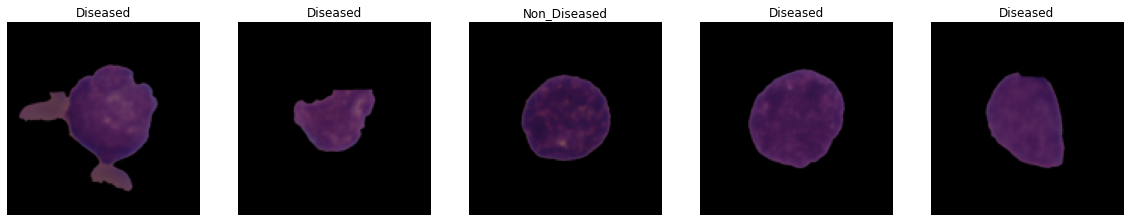

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(Image))
    ax[i].imshow(Image[rand])
    ax[i].axis('off')
    a = Label[rand]
    if a == 1:
        ax[i].set_title('Diseased')
    else:
        ax[i].set_title('Non_Diseased')

La librairie tqdm permet de voir la progression d'une boucle for par une barre qui charge